<a href="https://colab.research.google.com/github/nghiahuynh34/TypesOfCyperAttacks/blob/main/trojan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1 | Preprocessing Steps</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#016CC9'> Import Libraries</span></b>  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#016CC9'> Import Files</span></b>    

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/file/kddcup.csv")


## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2 | Dataframe Investigation</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#016CC9'> Basic Steps</span></b>

In [ ]:
df.shape

(396691, 42)

In [ ]:
pd.value_counts(df.dtypes)

int64      23
float64    15
object      4
dtype: int64

In [ ]:
# Information of datas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396691 entries, 0 to 396690
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     396691 non-null  int64  
 1   protocol_type                396691 non-null  object 
 2   service                      396691 non-null  object 
 3   flag                         396691 non-null  object 
 4   src_bytes                    396691 non-null  int64  
 5   dst_bytes                    396691 non-null  int64  
 6   land                         396691 non-null  int64  
 7   wrong_fragment               396691 non-null  int64  
 8   urgent                       396691 non-null  int64  
 9   hot                          396691 non-null  int64  
 10  num_failed_logins            396691 non-null  int64  
 11  logged_in                    396691 non-null  int64  
 12  num_compromised              396691 non-null  int64  
 13 

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.
1,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,396691.0,6.611148,4.025875e+02,0.0,0.00,0.0,0.00,42448.0
src_bytes,396691.0,3484.103826,1.102676e+06,0.0,0.00,1032.0,1032.00,693375640.0
dst_bytes,396691.0,250.960559,3.180015e+04,0.0,0.00,0.0,0.00,5155468.0
land,396691.0,0.000053,7.275662e-03,0.0,0.00,0.0,0.00,1.0
wrong_fragment,396691.0,0.008011,1.503945e-01,0.0,0.00,0.0,0.00,3.0
urgent,396691.0,0.000008,3.550246e-03,0.0,0.00,0.0,0.00,2.0
hot,396691.0,0.031889,7.618824e-01,0.0,0.00,0.0,0.00,28.0
num_failed_logins,396691.0,0.000141,1.384072e-02,0.0,0.00,0.0,0.00,5.0
logged_in,396691.0,0.008198,9.017002e-02,0.0,0.00,0.0,0.00,1.0
num_compromised,396691.0,0.005561,1.041348e-01,0.0,0.00,0.0,0.00,38.0


In [ ]:
# Check for null values for each attribute (column)
null_values_by_column = df.isnull().sum()

# Display the result
print("Null values by column:")
print(null_values_by_column)

Null values by column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate       

In [ ]:
df.nunique()

duration                       183
protocol_type                    3
service                         62
flag                            11
src_bytes                      221
dst_bytes                       90
land                             2
wrong_fragment                   3
urgent                           3
hot                             14
num_failed_logins                3
logged_in                        2
num_compromised                  5
root_shell                       2
su_attempted                     2
num_root                         5
num_file_creations               4
num_shells                       3
num_access_files                 3
num_outbound_cmds                1
is_host_login                    1
is_guest_login                   2
count                          480
srv_count                      410
serror_rate                     92
srv_serror_rate                 27
rerror_rate                     76
srv_rerror_rate                 27
same_srv_rate       

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#016CC9'> Null Value Check</span></b>

In [ ]:
# Display all unique values for each attribute (column)
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for duration: [    0    23    60     1     2     6     7    26   134    31     3    32
    67   192   179   198   156    41     9    10    12    14    27    28
    24    25    19    13    11     8     5     4  5057  5059  5051   337
   299 15161 15160 15168 15163 10127 10131 10128 10125 10132 10129 10134
 10120 10121  5079  5083  5085  5081  5084  5080  5076  5072  5055 15149
 15152 15157 15159 12546  5056  5039  5062  5041  5064  5043  5061  5049
  5048  5047  5044  5063  5068  5046  5052  5054  5058  5032  5040  5066
  5036  2426  5037  5053  5033  5042  5060 42448 42088 41065 40929 40806
 40682 40571 40448 40339 40232 40121 36783 36674 36570 36467 36323 36204
 32038 31925 31809 31709 31601 31501 31401 31301 31194 31061 30935 30835
 30735 30619 30518 30418 30317 30217 30077 25420 22921 22821 22721 22616
 22516 22416 22316 22216 21987 21887 21767 21661 21561 21455 21334 21223
 21123 20983 14682 14420 14319 14198 14098 13998 13898 13796 13678 13578
 13448 13348 13241 1314

In [ ]:
# display all value types of attacks
class_distribution = df['labels'].value_counts()
print(class_distribution)

smurf.           280790
neptune.         107201
back.              2203
satan.             1589
ipsweep.           1247
portsweep.         1040
warezclient.       1020
teardrop.           979
pod.                264
nmap.               231
guess_passwd.        53
land.                21
warezmaster.         20
imap.                12
ftp_write.            8
multihop.             7
phf.                  4
spy.                  2
Name: labels, dtype: int64


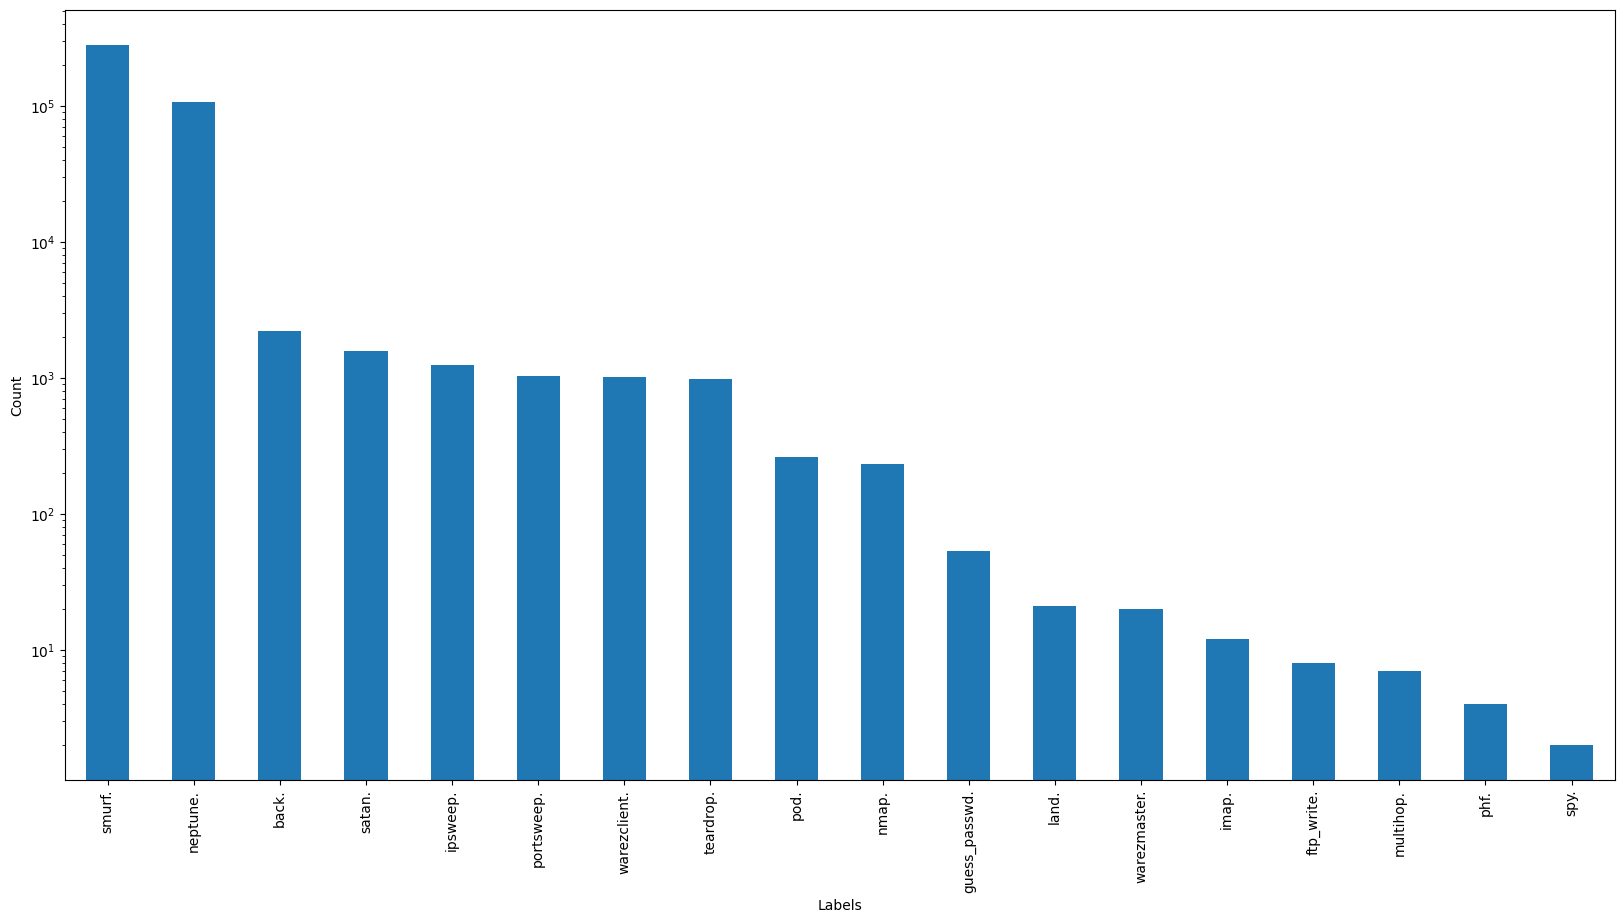

In [ ]:
plt.figure(figsize=(20,10))
plt.yscale("log")
df["labels"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.xlabel("Labels")
plt.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3 | Handle Datas</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#016CC9'> Transform all types of attack to common attacks</span></b>

In [ ]:
attack_families = {
    "back.": "dos",
    "ftp_write.": "r2l",
    "guess_passwd.": "r2l",
    "imap.": "r2l",
    "ipsweep.": "probe",
    "land.": "dos",
    "multihop.": "r2l",
    "neptune.": "dos",
    "nmap.": "probe",
    "phf.": "r2l",
    "pod.": "dos",
    "portsweep.": "probe",
    "satan.": "probe",
    "smurf.": "dos",
    "spy.": "r2l",
    "teardrop.": "dos",
    "warezclient.": "r2l",
    "warezmaster.": "r2l",
}

def map_attacks_to_families(attack):
    return attack_families[attack]
df['Class'] = df['labels'].apply(lambda attack: map_attacks_to_families(attack))
df = df.drop('labels',axis=1)
print(pd.unique(df["Class"]))

['dos' 'r2l' 'probe']


In [ ]:
# Display value counts each type of attacks
df = df[df['Class'] != 'normal']
class_Label = df['Class'].value_counts()
print(class_Label)

dos      391458
probe      4107
r2l        1126
Name: Class, dtype: int64


<Axes: title={'center': 'Count of Class'}, xlabel='Class', ylabel='count'>

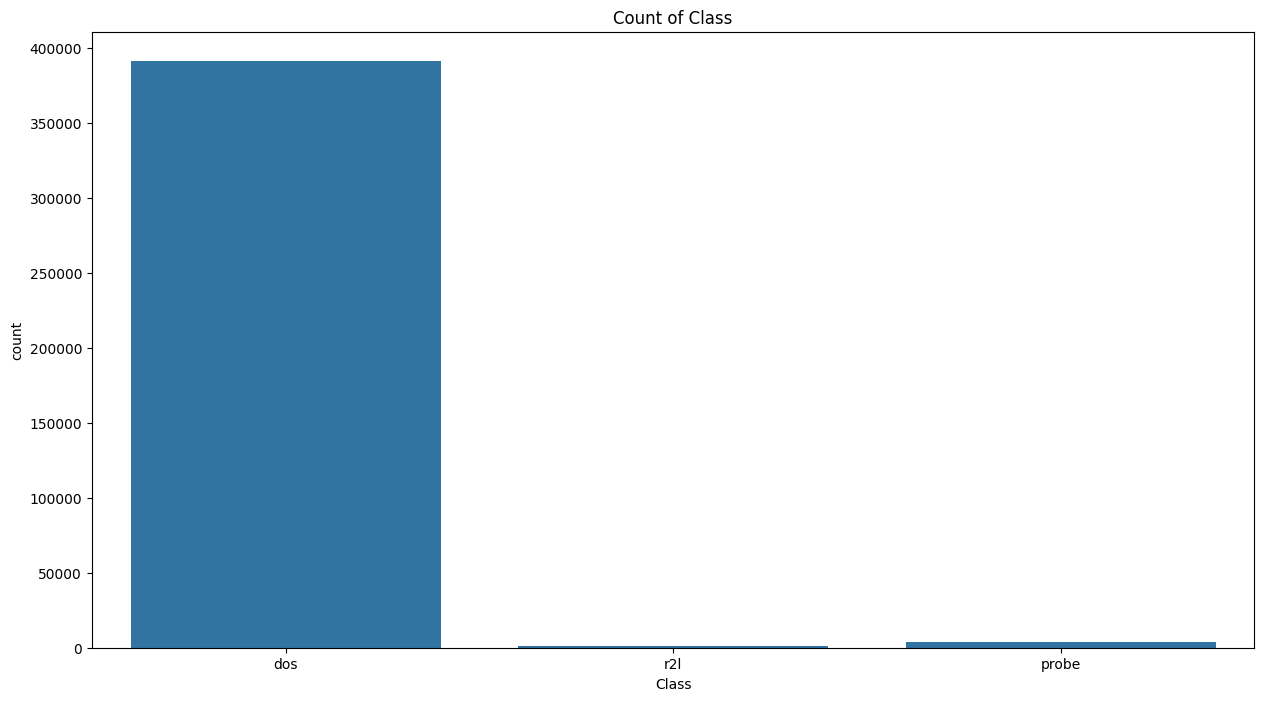

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Class')

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#016CC9'> Delete unimportant features</span></b>

In [ ]:
# Finding categorical features
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['service', 'flag', 'Class', 'protocol_type']

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

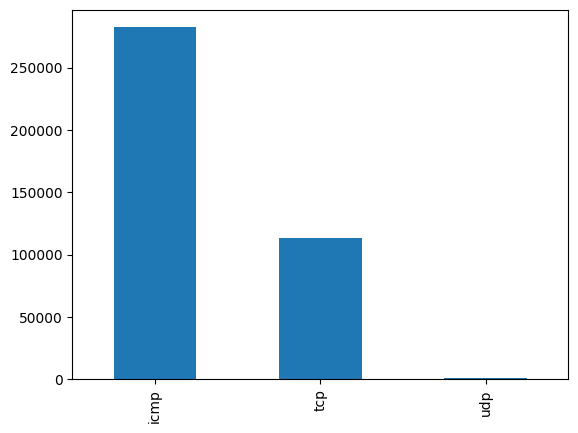

In [ ]:
bar_graph('protocol_type')

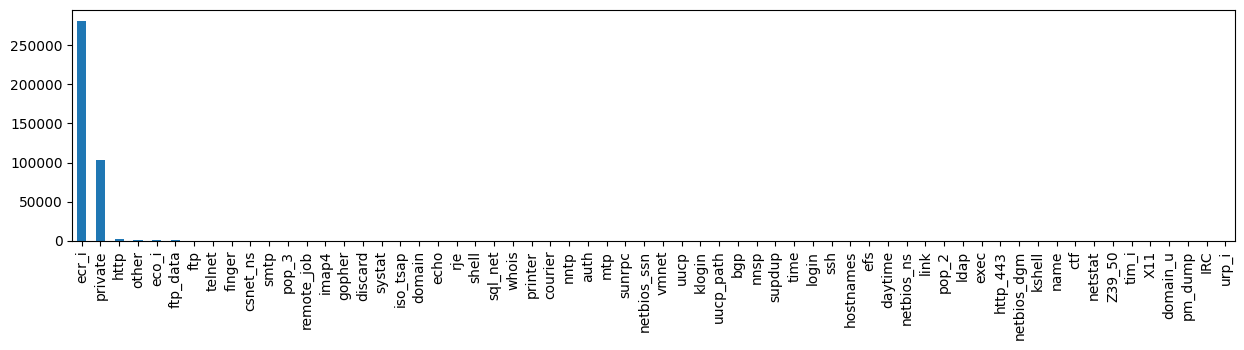

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

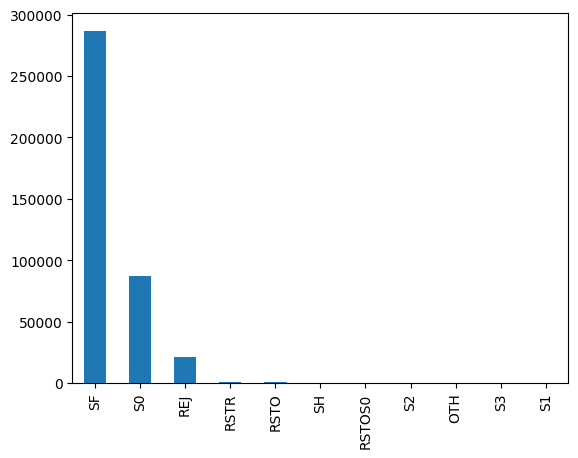

In [ ]:
bar_graph('flag')

In [ ]:
# convert categorical to numerical
number = preprocessing.LabelEncoder()
for name in cate_cols:
  df[name] = number.fit_transform(df[name])

<Axes: title={'center': 'Count of Class'}, xlabel='Class', ylabel='count'>

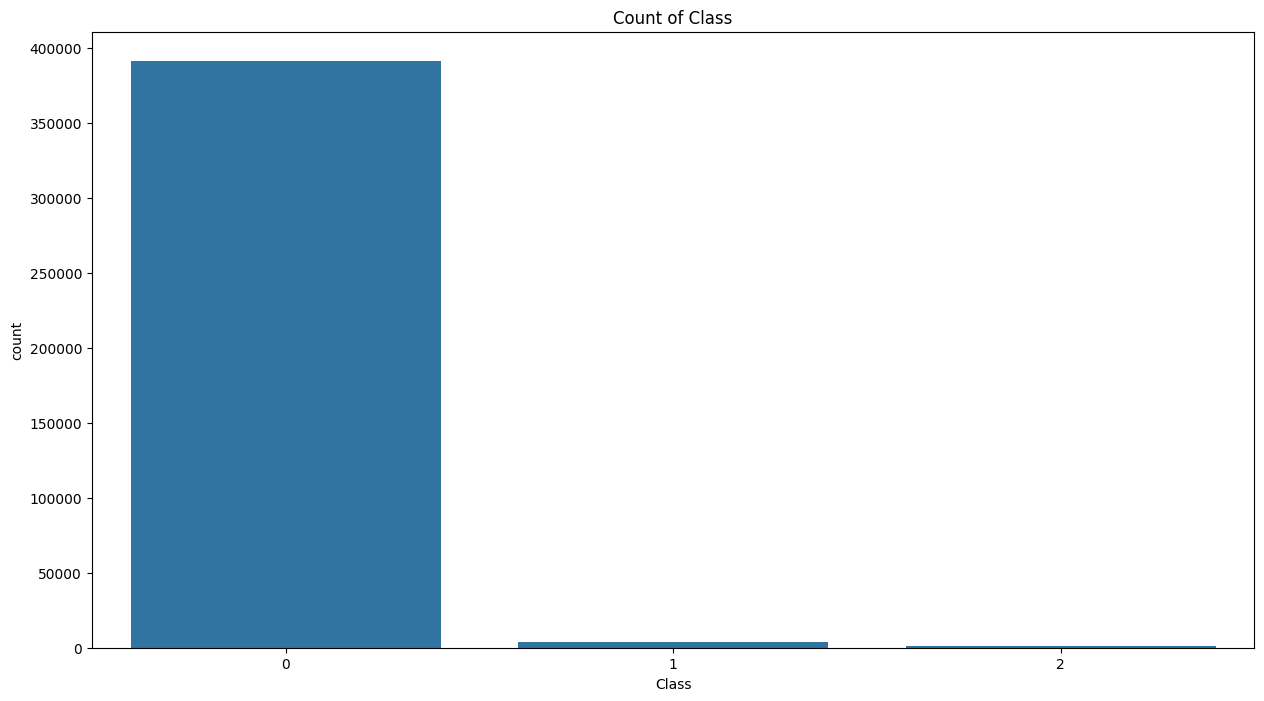

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Class')
# dos      391458
# probe      4107
# r2l        1126

In [ ]:
# Display value counts each type of attacks
class_Label = df['Class'].value_counts()
print(class_Label)

0    391458
1      4107
2      1126
Name: Class, dtype: int64


In [ ]:
# The "is_host_login","num_outbound_cmds" features have only one value, so they do not impact the data
# The 'service' feature has more than 20 values, but since it predominantly focuses on the first two values, we will also disregard it in the analysis
df = df.drop(["is_host_login","num_outbound_cmds","service"],axis=1)


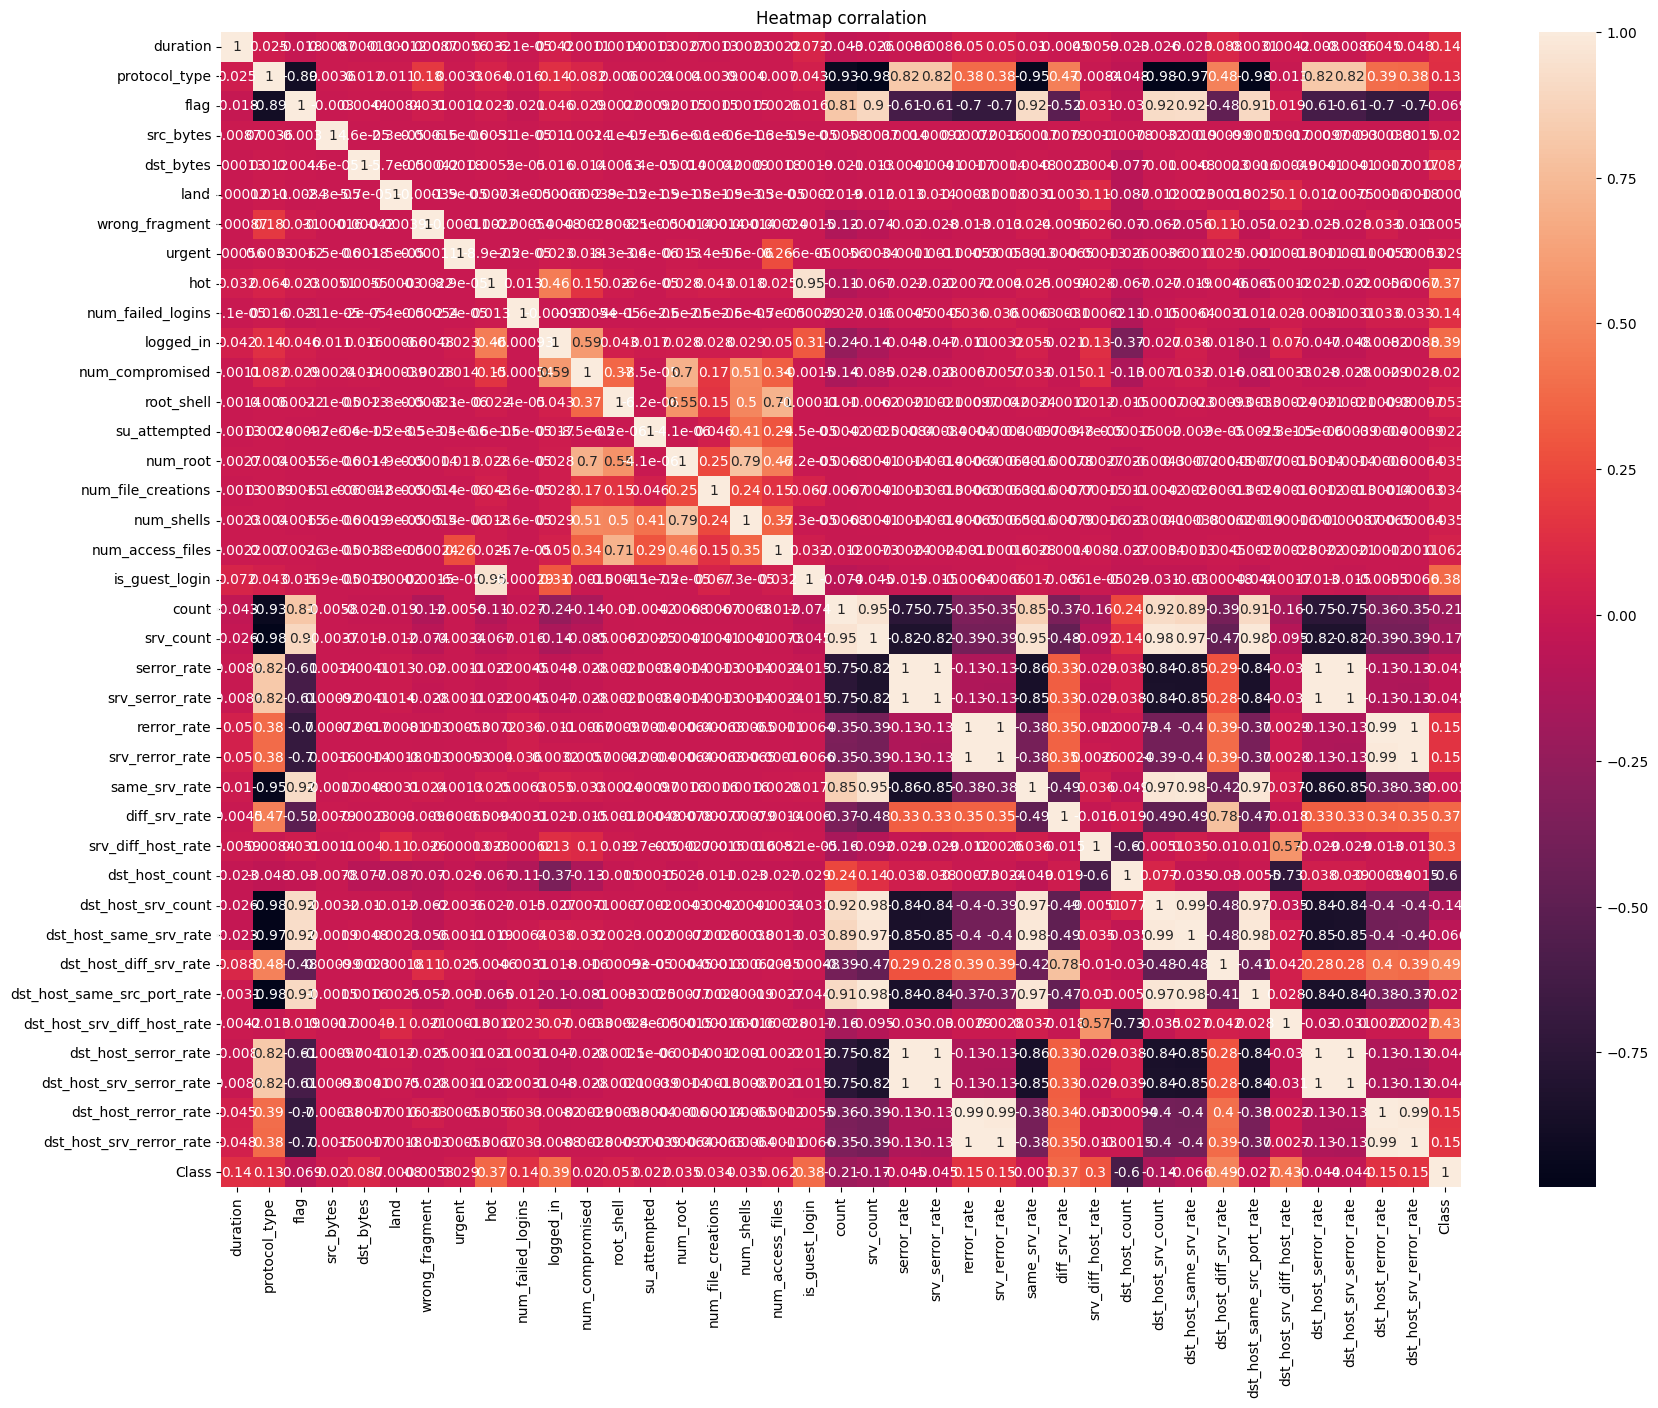

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(df).corr(), annot=True);

In [ ]:

# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
# df['dst_host_serror_rate'].corr(df['serror_rate'])
df.drop('num_root', axis = 1, inplace = True)

# # This variable is highly correlated with serror_rate and should be ignored for analysis.
# # (Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# #(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)


<ipython-input-42-1d3a500e0ba7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=p[i-1],x='Class',palette=['#016CC9','#DEB078'],showfliers=True)
<ipython-input-42-1d3a500e0ba7>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df,y=p[i-1],x='Class',palette=['#016CC9','#DEB078'],showfliers=True)
<ipython-input-42-1d3a500e0ba7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y=p[i-1],x='Class',palette=['#016CC9','#DEB078'],showfliers=True)
<ipython-input-42-1d3a500e0ba7>:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produ

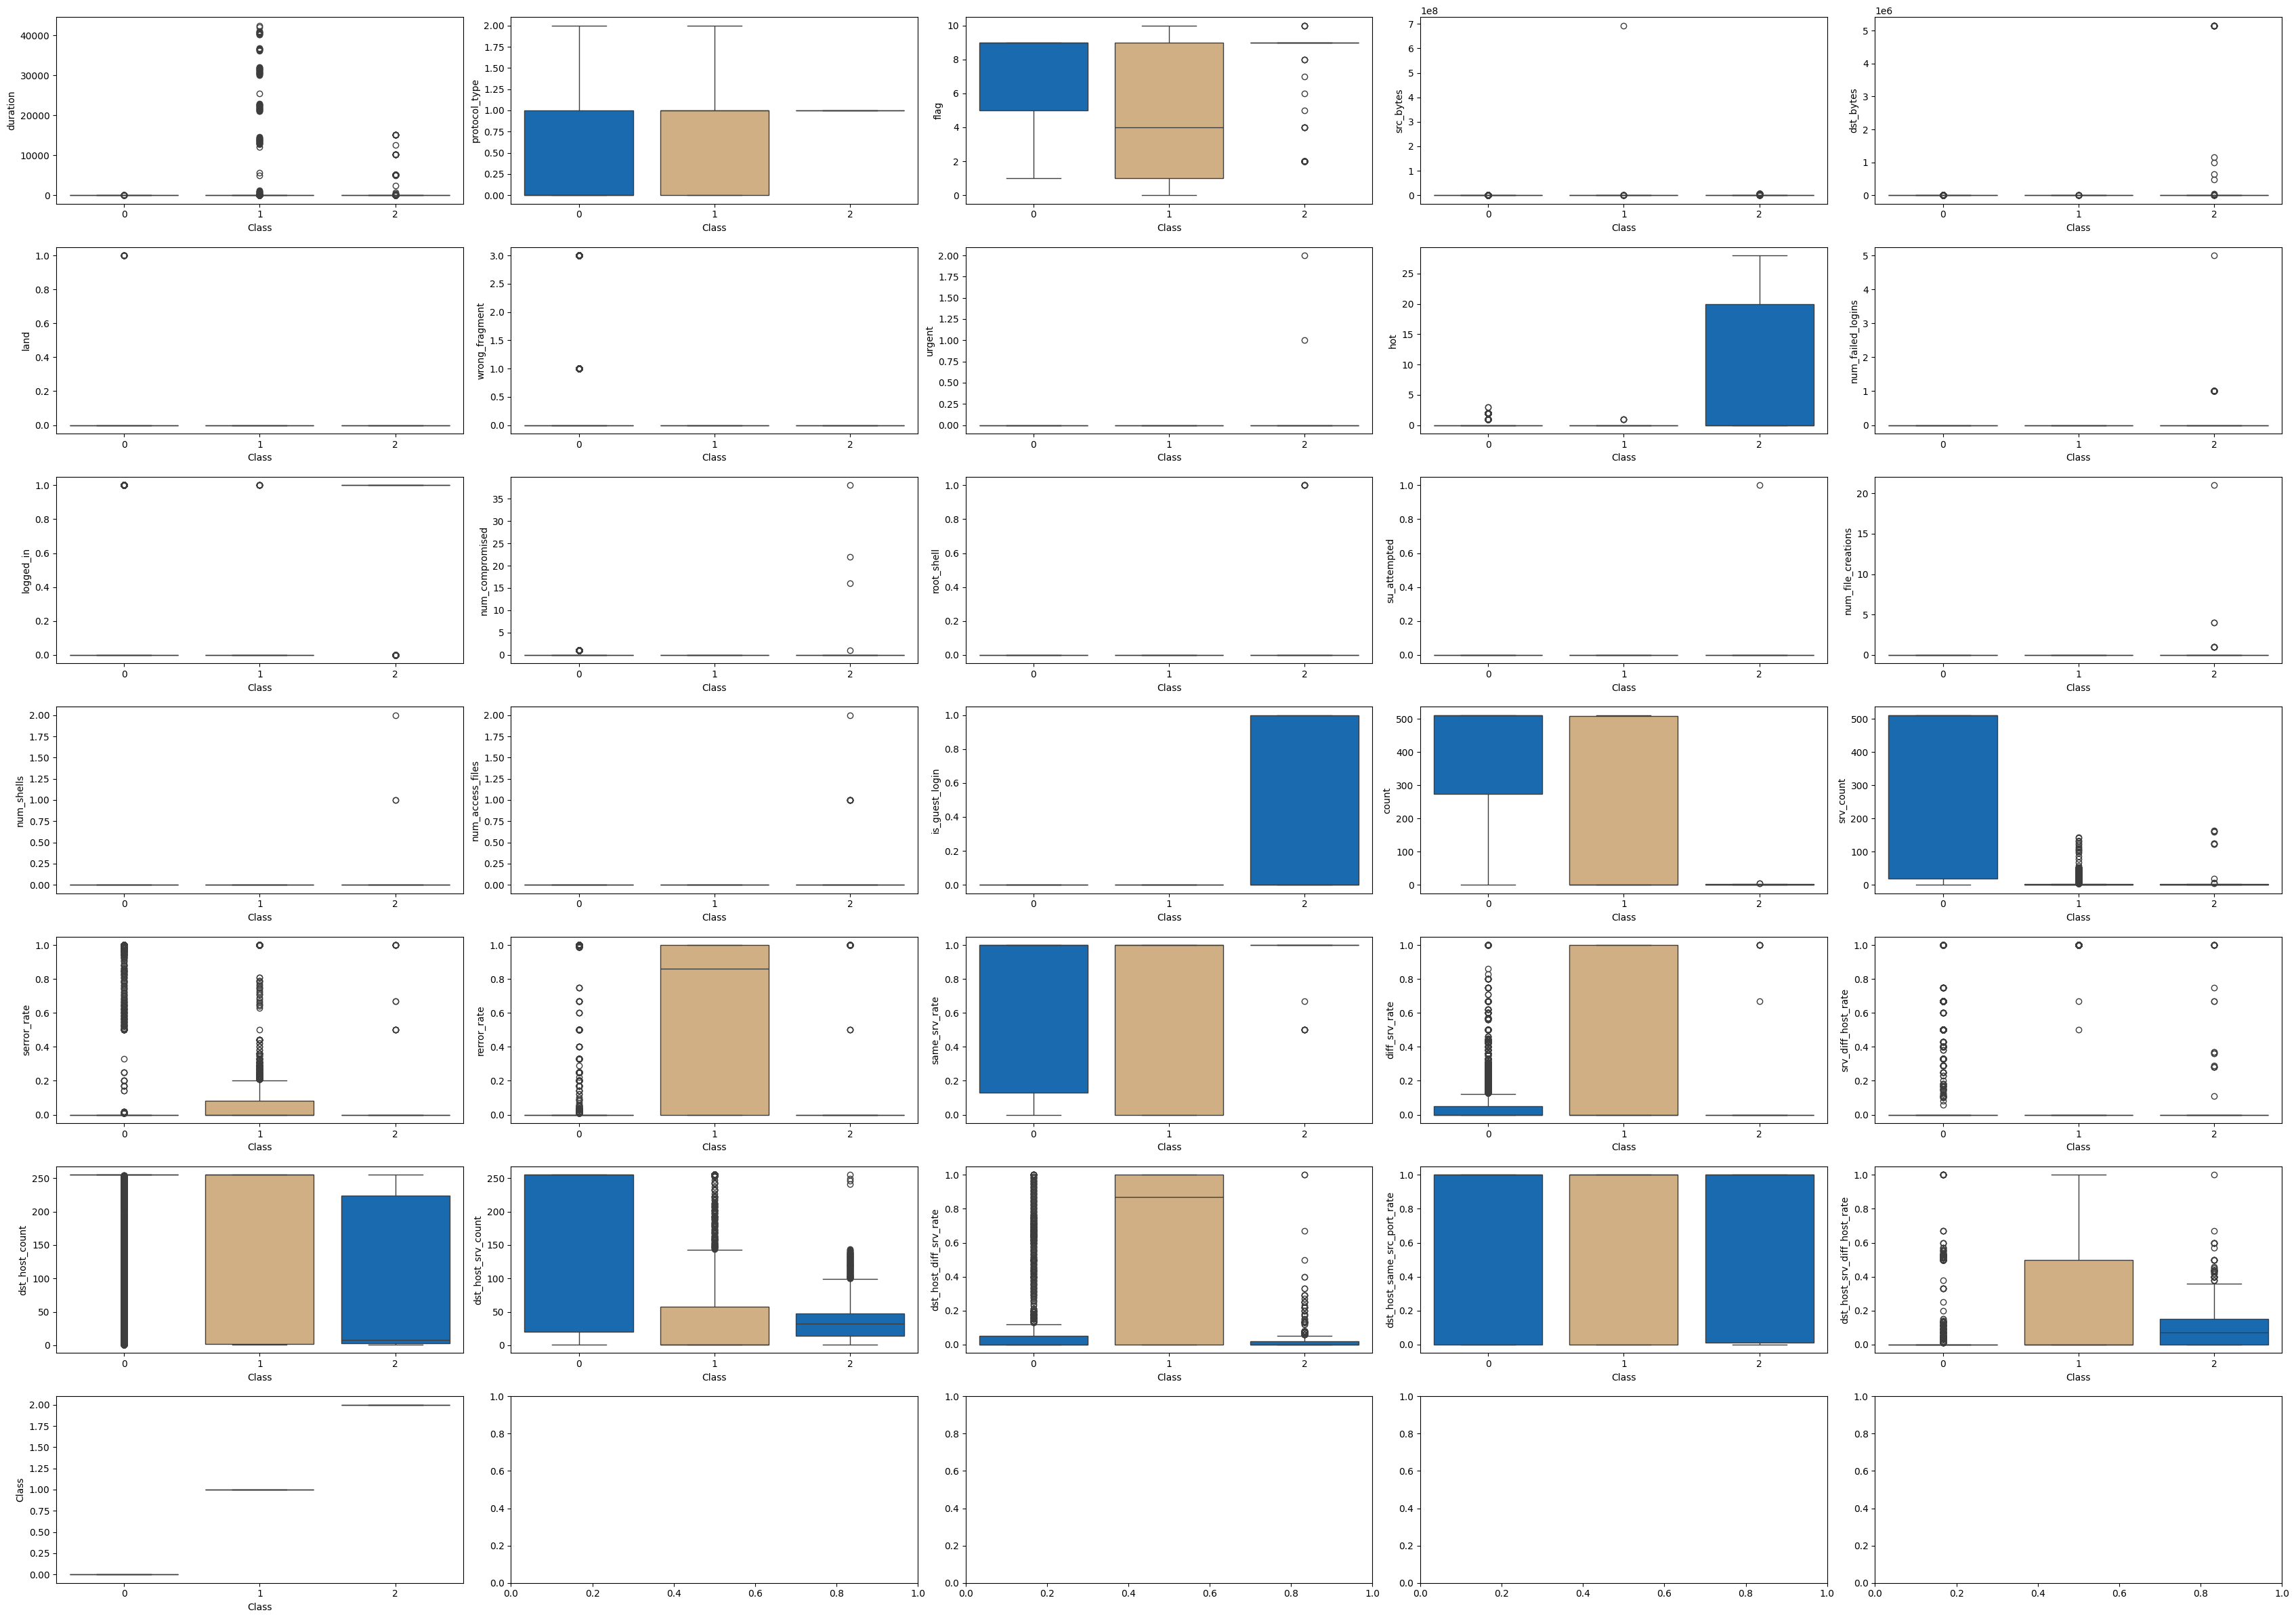

In [ ]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("Class")
y=5
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(34,6*4))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=p[i-1],x='Class',palette=['#016CC9','#DEB078'],showfliers=True)
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()
plt.show()

In [ ]:
#  [1 0 2]
#   ['tcp' 'icmp' 'udp']
# TCP (Transmission Control Protocol):

# Giải thích: TCP là một trong những giao thức chính của Internet Protocol Suite, được sử dụng để truyền tải dữ liệu giữa các máy tính trên mạng.
# Ví dụ: Một kết nối web thông thường sử dụng giao thức TCP. Khi bạn truy cập một trang web bằng trình duyệt, dữ liệu được truyền tải qua giao thức TCP để đảm bảo tính toàn vẹn và độ tin cậy.
# ICMP (Internet Control Message Protocol):

# Giải thích: ICMP thường được sử dụng để gửi thông báo lỗi và trạng thái giữa các máy tính trên mạng. Nó không được sử dụng để truyền tải dữ liệu người dùng.
# Ví dụ: Ping là một ví dụ phổ biến của giao thức ICMP. Khi bạn ping một máy chủ, máy chủ sẽ trả lời bằng gói tin ICMP để xác nhận sự kết nối.
# UDP (User Datagram Protocol):

# Giải thích: UDP là một giao thức truyền tải dữ liệu không đảm bảo tính toàn vẹn và độ tin cậy so với TCP. Nó thích hợp cho các ứng dụng cần truyền tải dữ liệu nhanh chóng và có thể chấp nhận mất mát một số gói tin.
# Ví dụ: Truyền tải video trực tuyến thường sử dụng giao thức UDP để giảm độ trễ, ngay cả khi mất một số gói tin, vẫn có thể tiếp tục phát video mà không cần chờ đợi.
#    [ 5  9  8  2  4  1  3  7 10  6  0]
#     ['S0' 'SF' 'S3' 'RSTO' 'RSTR' 'REJ' 'RSTOS0' 'S2' 'SH' 'S1' 'OTH']
# S0 (Connection Attempt Seen, No Reply):

# Giải thích: Gói tin bắt đầu một kết nối, nhưng không có phản hồi nào từ máy chủ đích.
# Ví dụ: Người tấn công có thể thử nghiệm xem máy chủ có mở cổng không bằng cách gửi gói tin mà không mong đợi phản hồi.
# SF (Established Connection, No Further Activity):

# Giải thích: Kết nối đã được thiết lập và không có hoạt động tiếp theo sau đó.
# Ví dụ: Một người dùng đã thiết lập kết nối với một trang web và đã tải xong trang.
# S3 (Established Connection, Some Additional Data):

# Giải thích: Kết nối đã được thiết lập và có một số dữ liệu bổ sung được truyền tải.
# Ví dụ: Người dùng tải một trang web và sau đó tải thêm một số hình ảnh và tài liệu.
# RSTO (Connection Established, No Data Received):

# Giải thích: Kết nối đã được thiết lập, nhưng không có dữ liệu nào được nhận.
# Ví dụ: Một yêu cầu kết nối được gửi nhưng không có phản hồi từ máy chủ.
# RSTR (Established Connection, Some Data Received):

# Giải thích: Kết nối đã được thiết lập và nhận được một số dữ liệu.
# Ví dụ: Người dùng tải một trang web và nhận một số dữ liệu văn bản.
# REJ (Connection Attempt Rejected):

# Giải thích: Yêu cầu kết nối bị từ chối.
# Ví dụ: Một yêu cầu kết nối đến một cổng đóng bị từ chối.
# RSTOS0 (Connection Attempt on Closed Port):

# Giải thích: Kết nối được thực hiện trên một cổng đã đóng.
# Ví dụ: Người tấn công thử nghiệm kết nối đến một cổng không mở.
# S2 (Connection Established, Sent Initial Data):

# Giải thích: Kết nối đã được thiết lập và đã gửi dữ liệu ban đầu.
# Ví dụ: Người dùng thiết lập kết nối và gửi một số dữ liệu ban đầu.
# SH (Established Connection, Sent Initial Data, Some Data Received):

# Giải thích: Kết nối đã được thiết lập, đã gửi dữ liệu ban đầu và nhận được một số dữ liệu.
# Ví dụ: Người dùng thiết lập kết nối, gửi một số dữ liệu và nhận một số phản hồi.
# S1 (Connection Established, Sent Initial Data, No Data Received):

# Giải thích: Kết nối đã được thiết lập, đã gửi dữ liệu ban đầu, nhưng không nhận được dữ liệu nào.
# Ví dụ: Người dùng thiết lập kết nối và gửi một số dữ liệu, nhưng không nhận được phản hồi.
# OTH (Other):

# Giải thích: Các trạng thái kết nối khác không rơi vào các danh mục trên.
# Ví dụ: Một tình huống kết nối không thể phân loại theo các trạng thái trên.

In [ ]:
class_means = df.groupby('Class').mean()
print(class_means.T)

Class                                 0              1              2
duration                       0.000725     485.029949     559.752220
protocol_type                  0.284534       0.740687       1.000000
flag                           7.695308       4.862187       8.684725
src_bytes                    977.053753  168832.725590  271972.574600
dst_bytes                     46.330853       0.449233   72304.944050
land                           0.000054       0.000000       0.000000
wrong_fragment                 0.008118       0.000000       0.000000
urgent                         0.000000       0.000000       0.002664
hot                            0.011048       0.000974       7.389876
num_failed_logins              0.000000       0.000000       0.049734
logged_in                      0.005628       0.002435       0.922735
num_compromised                0.005439       0.000000       0.068384
root_shell                     0.000000       0.000000       0.005329
su_attempted        


0.DoS (Distributed Denial of Service):

* Thời gian kết nối (duration): Ngắn (gần 0).
* Loại giao thức(protocol_type):đa dạng
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: Lượng byte nguồn cao (977.05), lượng byte đích thấp (46.33).
* Thông tin về trạng thái kết nối và tình trạng đăng nhập:Tỉ lệ đăng nhập, cảnh báo hệ thống thấp (0.0056).Tương tác, làm việc file, cố gắng tăng quyền hạn là không có.
* Thông tin về số lần truy cập và đếm: Số lần truy cập và dịch vụ cụ thể cao (415.51, 366.85).
* Tỉ lệ lỗi (serror_rate, rerror_rate,..): thấp cả khi gửi và nhận (0.22, 0.05).
* Thông tin về máy chủ đích: Hầu hết các kết nối đến cùng một máy chủ đích và sử dụng cùng một cổng nguồn.

1.Probe:
* Thời gian kết nối (duration): Cao.
* Loại giao thức(protocol_type):đa dạng
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: nguồn (src_bytes) rất cao và đích (dst_bytes) thấp
* Thông tin về trạng thái kết nối và tình trạng đăng nhập: Tỉ lệ đăng nhập thấp (0.0024).Tương tác, làm việc file, cố gắng tăng quyền hạn là không có.
* Thông tin về số lần truy cập và đếm:  Số lần truy cập và dịch vụ cụ thể khá thấp (171.94, 7.47).
* Tỉ lệ lỗi (serror_rate, rerror_rate,..):Tỉ lệ lỗi cao khi nhận (0.57), thấp khi gửi (0.07).
* Thông tin về máy chủ đích:  Có sự đa dạng trong kết nối đến máy chủ đích và cổng nguồn.
2.Remote-to-Local (R2L):
* Thời gian kết nối (duration): Thời gian lớn (559.75).
* Loại giao thức(protocol_type):Thường sử dụng một loại giao thức cụ thể(1)
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: Lượng byte nguồn và đích đều cao (271972.57, 72304.94), đặc trưng cho việc chuyển đổi dữ liệu giữa nguồn và đích.
* Thông tin về trạng thái kết nối và tình trạng đăng nhập: Tỉ lệ đăng nhập cao (0.9227). Kết nối có quyền root vàcố gắng sử dụng lệnh su,có tương tác với file và có một số lượng đáng kể kết nối có trạng thái là khách.
* Thông tin về số lần truy cập và đếm: Số lượng yêu cầu (count),Số lượng dịch vụ (srv_count): rất thấp
* Tỉ lệ lỗi (serror_rate, rerror_rate): Tỉ lệ lỗi thấp cả khi gửi và nhận (0.011, 0.045).
* Thông tin về máy chủ đích: Hầu hết các kết nối đến cùng một máy chủ đích và sử dụng cùng một cổng nguồn.


## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4 | MODELLING</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#016CC9'> Spliting datas </span></b>

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
#Split your data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#016CC9'> Decision Tree model</span></b>

<b><span style='color:#DEB078'>4.2.1 |</span><span style='color:#016CC9'>Gini</span></b>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Create a Decision Tree classifier
dt_classifier1 = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': range(1,20),
    'min_samples_leaf': [1,2,5,10,50,100,200],
    'min_samples_split': [2,5,10,50,100,200]
}
# Create the GridSearchCV object
grid_searchGN = GridSearchCV(dt_classifier1, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_searchGN.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_searchGN.best_params_)

# Get the best estimator (model) found by GridSearchCV
best_dt_classifier1 = grid_searchGN.best_estimator_

# Make predictions on the test set using the best model
y_predGN1 = best_dt_classifier1.predict(X_test)

# Evaluate the model
accuracyGS = accuracy_score(y_test, y_predGN1)
print("Accuracy:", accuracyGS)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_predGN1))

Best Hyperparameters: {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.9999495834331161
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339

Grid Search Time: 2494.1792969703674 seconds
Prediction Time using Best Model: 0.007181644439697266 seconds


In [ ]:
# Initialize the Decision Tree classifier
dt_classifierGini = DecisionTreeClassifier(max_depth= 13,min_samples_split=10, random_state=42)
start_timeDT = time.time()
# Train the model on the training set
dt_classifierGini.fit(X_train, y_train)
end_timeDT = time.time()
# Make predictions on the test set
start_timeDTP = time.time()
y_predDT = dt_classifierGini.predict(X_test)
end_timeDTP = time.time()
accuracyDT=accuracy_score(y_test,y_predDT)
print(accuracyDT)
print("Classification Report:\n", classification_report(y_test, y_predDT))

0.9999495834331161
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



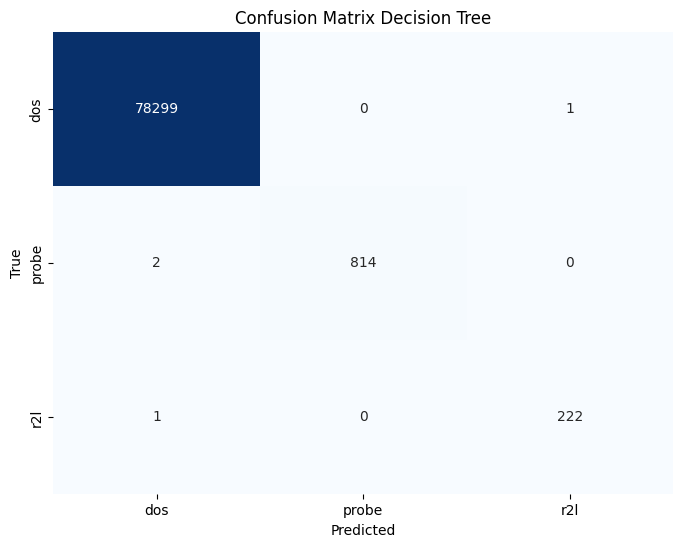

In [ ]:
# #Visualization
# Create a confusion matrix
cm = confusion_matrix(y_test, y_predDT)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[ 'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l' ])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

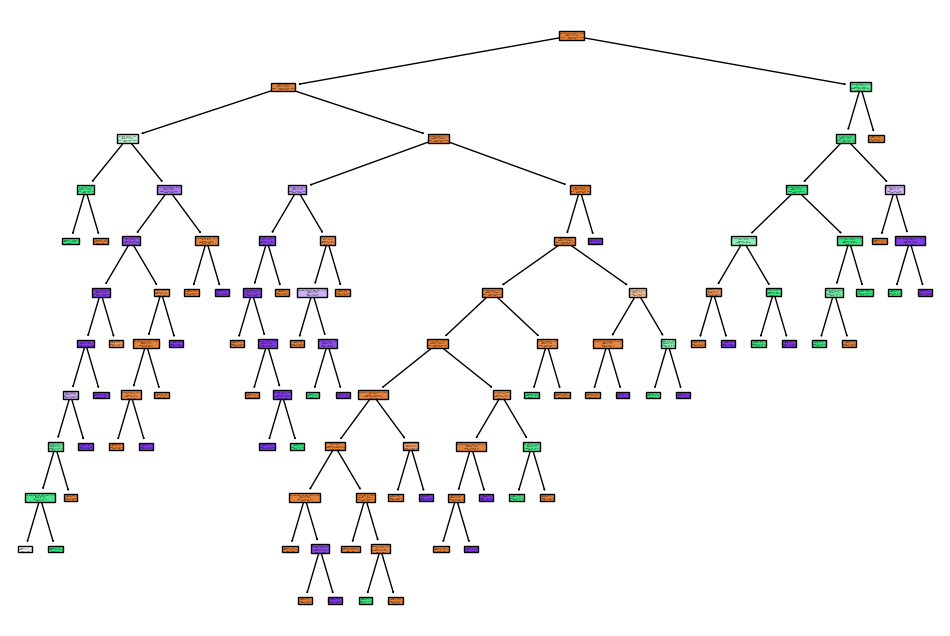

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifierGini, filled=True, feature_names=df.columns, class_names=['dos','r2l' ,'probe' ])
plt.show()

<b><span style='color:#DEB078'>4.2.3 |</span><span style='color:#016CC9'>Entropy</span></b>

In [ ]:
# Create a Decision Tree classifier
dt_classifierEP = DecisionTreeClassifier(random_state=42,criterion="entropy")

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': range(1,20),
    'min_samples_leaf': [1,2,5,10,50,100,200],
    'min_samples_split': [2,5,10,50,100,200]
}

# Create the GridSearchCV object
grid_searchEP = GridSearchCV(dt_classifierEP, param_grid, cv=5, scoring='accuracy')

# Measure the time for training
start_timeGS = time.time()

# Fit the grid search to the data
grid_searchEP.fit(X_train, y_train)

end_timeGS = time.time()

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_searchEP.best_params_)

# Get the best estimator (model) found by GridSearchCV
best_dt_classifierEP = grid_searchEP.best_estimator_

# Measure the time for prediction
start_timeGSP = time.time()

# Make predictions on the test set using the best model
y_predGS = best_dt_classifierEP.predict(X_test)

end_timeGSP = time.time()

# Evaluate the model
accuracyGS = accuracy_score(y_test, y_predGS)
print("Accuracy:", accuracyGS)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_predGS))

# Print timing information
print("Grid Search Time:", end_timeGS - start_timeGS, "seconds")
print("Prediction Time using Best Model:", end_timeGSP - start_timeGSP, "seconds")


Best Hyperparameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9998991668662323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      0.99      0.99       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339

Grid Search Time: 1488.0967137813568 seconds
Prediction Time using Best Model: 0.0039865970611572266 seconds


In [ ]:
# Initialize the Decision Tree classifier
dt_classifierIP = DecisionTreeClassifier(criterion="entropy",max_depth=12,random_state=42)
# Train the model on the training set
dt_classifierIP.fit(X_train, y_train)
# Make predictions on the test set
y_predDTIP = dt_classifierIP.predict(X_test)
# accuracyDT = accuracy_score(y_test, y_predDT)
print("Accuracy:", accuracy_score(y_test, y_predDTIP))
print("Classification Report:\n", classification_report(y_test, y_predDTIP))


Accuracy: 0.9998991668662323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      0.99      0.99       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
# plt.figure(figsize=(8, 6))
# plt.plot(max_depth_EP_values, accuray_EP, marker='o')
# plt.xlabel('Max_depth')
# plt.ylabel('Accuracy')
# plt.title('Optimal math_depth')
# plt.grid(True)
# plt.show()

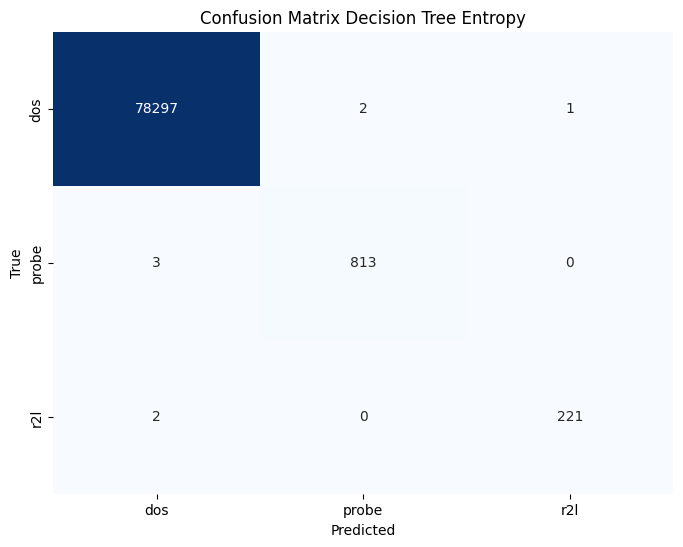

In [ ]:
# #Visualization

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predDTIP)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[  'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree Entropy')
plt.show()

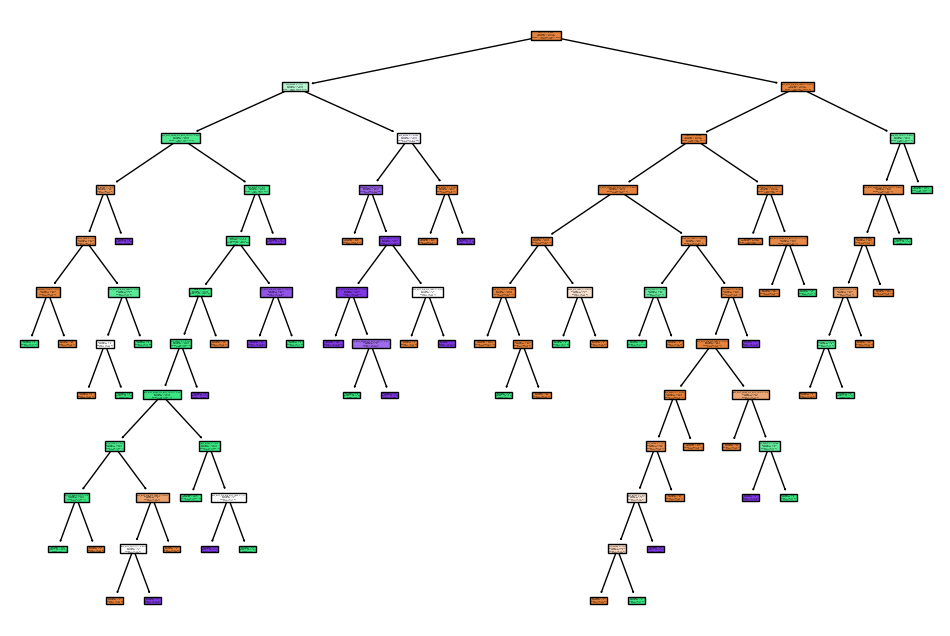

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifierIP, filled=True, feature_names=df.columns, class_names=['dos' ,'r2l' ,'probe' ])
plt.show()

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#016CC9'> RandomForest model</span></b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Định nghĩa mô hình RandomForest
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200,300],
    'min_samples_leaf': [1,2,5,10,50,100,200],
    'min_samples_split': [2,5,10,50,100,200]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên lưới tham số
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.999974791716558


In [ ]:
# Định nghĩa mô hình RandomForest
rf_modelRF1 = RandomForestClassifier()
param_gridRF1 = {
    'n_estimators': [100, 200,300],
    'max_depth': range(1,20),
    'min_samples_leaf': [5,10,50,100,200,300]
}

# Tạo đối tượng GridSearchCV
grid_searchRF1 = GridSearchCV(estimator=rf_modelRF1, param_grid=param_gridRF1, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên lưới tham số
grid_searchRF1.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_searchRF1.best_params_)

# In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
best_modelRF1 = grid_searchRF1.best_estimator_
accuracyRF1 = best_modelRF1.score(X_test, y_test)
print("Accuracy on Test Set:", accuracyRF1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFR = RandomForestClassifier(n_estimators=300)
start_timeRF = time.time()
RFR.fit(X_train, y_train)
end_timeRF = time.time()
start_timeRFP = time.time()
y_predRF=RFR.predict(X_test)
end_timeRFP = time.time()
feature_importances = RFR.feature_importances_

scoreRF = accuracy_score(y_test,y_predRF)
print("Accuracy on Test Set:", accuracy_score(y_test,y_predRF))
print("Classification Report:\n", classification_report(y_test, y_predRF))

In [ ]:
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

for f in range(len(indices)):
    most_important_feature_name = df.columns[indices[f]]
    print(f"{f + 1}. Feature {indices[f]}: Name = {most_important_feature_name}, Importance = {feature_importances[indices[f]]}")

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['dos' ,'probe' ,'r2l' ], yticklabels=['dos' ,'probe' ,'r2l'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix RandomForest')
plt.show()

### <b><span style='color:#DEB078'>4.5 |</span><span style='color:#016CC9'> GRADIENT BOOSTING CLASSIFIER Model</span></b>

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200,
                                 learning_rate=0.05,
                                           max_depth=4)
start_timeGb = time.time()
# Train the model
gb_classifier.fit(X_train, y_train)
end_timeGB = time.time()
# Make predictions
start_timeGBP = time.time()
y_pred_GB = gb_classifier.predict(X_test)
end_timeGBP = time.time()
# Evaluate the model on the test data
accuracyGB = accuracy_score(y_test, y_pred_GB)
print("Accuracy:", accuracyGB)
print("Classification Report:\n", classification_report(y_test, y_pred_GB))

In [ ]:
# feature_importances_=gb_classifier.feature_importances_

In [ ]:
# indices = sorted(range(len(feature_importances_)), key=lambda k: feature_importances_[k], reverse=True)
# for f in range(len(indices)):
#     most_important_feature_name = df.columns[indices[f]]
#     print(f"{f + 1}. Feature {indices[f]}: Name = {most_important_feature_name}, Importance = {feature_importances_[indices[f]]}")

In [ ]:
# from sklearn.metrics import mean_squared_error
# # Tính MSE
# mse = mean_squared_error(y_test, y_pred_GB)
# print(f'MSE: {mse}')

In [2]:
# Định nghĩa mô hình RandomForest
rf_model6 = GradientBoostingClassifier()
param_grid6 = {
   'learning_rate':[0.025,0.05,0.1],
    'n_estimators':[100,200,300],
}
# Tạo đối tượng GridSearchCV
grid_search6 = GridSearchCV(estimator=rf_model6, param_grid=param_grid6, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên lưới tham số
grid_search6.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search6.best_params_)

# In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
best_model6 = grid_search6.best_estimator_
accuracy6 = best_model6.score(X_test, y_test)
print("Accuracy6 on Test Set:", accuracy6)

NameError: name 'X_train' is not defined

In [ ]:
# Định nghĩa mô hình RandomForest
rf_model7 = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 400)
param_grid7 = {
    'max_depth':np.arange(1,10),
}
# Tạo đối tượng GridSearchCV
grid_search7 = GridSearchCV(estimator=rf_model7, param_grid=param_grid7, cv=5, scoring='accuracy')

# Thực hiện tìm kiếm trên lưới tham số
grid_search7.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search7.best_params_)

# In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
best_model7 = grid_search7.best_estimator_
accuracy7 = best_model7.score(X_test, y_test)
print("Accuracy7 on Test Set:", accuracy7)

In [ ]:
# cmGBC = confusion_matrix(y_test, y_pred_GB)
# # Display the confusion matrix using a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cmGBC, annot=True, fmt='d', cmap='Blues', xticklabels=['dos','probe' ,'r2l' ], yticklabels=['dos','probe' ,'r2l' ])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix GRADIENT BOOSTING ')
# plt.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5 | Evaluation all the models</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#016CC9'> Evaluation Accuracy</span></b>

In [ ]:
# names = ['DT','RF','GB']
# values = [accuracyDT,scoreRF,accuracyGB]
# print(values)
# f = plt.figure(figsize=(15,3),num=1)
# plt.subplot(131)
# plt.ylim(0,1)
# plt.bar(names,values)

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#016CC9'> Evaluation Time training</span></b>

In [ ]:
# names = ['DT','RF','GB']
# values = [end_timeDT-start_timeDT,end_timeRF-start_timeRF,end_timeGB-start_timeGb]
# f = plt.figure(figsize=(15,3),num=1)
# plt.subplot(131)
# plt.ylim(0,30)
# plt.bar(names,values)

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#016CC9'> Evaluation Time predicting</span></b>

In [ ]:
# names = ['DT','RF','GB']
# values = [end_timeDTP-start_timeDTP,end_timeRFP-start_timeRFP,end_timeGBP-start_timeGBP]
# f = plt.figure(figsize=(15,3),num=1)
# plt.subplot(131)
# plt.ylim(0,1.4)
# plt.bar(names,values)

In [ ]:
newData = pd.read_csv("/content/sample_data/testAttack.csv")

In [ ]:
newData = newData.dropna()

In [ ]:
# these are two feature only have one value so they dont affect to data
newData = newData.drop(["is_host_login","num_outbound_cmds","Class","Unnamed: 42"],axis=1)
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
newData.drop('num_root', axis = 1, inplace = True)

# # This variable is highly correlated with serror_rate and should be ignored for analysis.
# # (Correlation = 0.9983615072725952)
newData.drop('srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9947309539817937)
newData.drop('srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# #(Correlation = 0.9993041091850098)
newData.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9869947924956001)
newData.drop('dst_host_serror_rate', axis = 1, inplace = True)
# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9821663427308375)
newData.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9851995540751249)
newData.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9865705438845669)
newData.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
newData.drop('service', axis = 1, inplace = True)

In [ ]:
num_cols = newData._get_numeric_data().columns
cate_cols = list(set(newData.columns)-set(num_cols))
number = preprocessing.LabelEncoder()
for name in cate_cols:
  newData[name] = number.fit_transform(newData[name])

In [ ]:
newData.head()

In [ ]:
tfdata = sc.fit_transform(newData)
tfdata

In [ ]:
dtp = dt_classifierGini.predict(tfdata)
print(dtp)
print("---DTreeEntropy---")
dtpip1 = dt_classifierIP.predict(tfdata)
print(dtpip1)
print("--Random forest----")
rf = RFR.predict(tfdata)
print(rf)
print("---Gradient boosting---")
gb = gb_classifier.predict(tfdata)
print(gb)
# rg = model.predict(tfdata)
# print(rg)
# satan.probe 1
# multihop.r2l 2
# land.ddos 0